In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
import evaluate
import tqdm

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-06-26 01:49:19,636] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:

rand_accs_all= []
easy_accs_all = []
easymedium_accs_all = []

subsample_idxs = np.arange(5000)


for num_epochs in [3, 4, 5, 6]:
    rand_acc = (np.load(f"../ckpts/math_aug_fft_rand10000_{num_epochs}epochs/test_answer_types5.npy")==0)[subsample_idxs].mean()
    rand_accs_all.append(rand_acc)

    easy_acc = (np.load(f"../ckpts/math_aug_fft_easy10000_{num_epochs}epochs/test_answer_types5.npy")==0)[subsample_idxs].mean()
    easy_accs_all.append(easy_acc)
    
    easymedium_acc = (np.load(f"../ckpts/math_aug_fft_easymedium10000_{num_epochs}epochs/test_answer_types5.npy")==0)[subsample_idxs].mean()
    easymedium_accs_all.append(easymedium_acc)

Text(0.5, 0, 'Number of epochs')

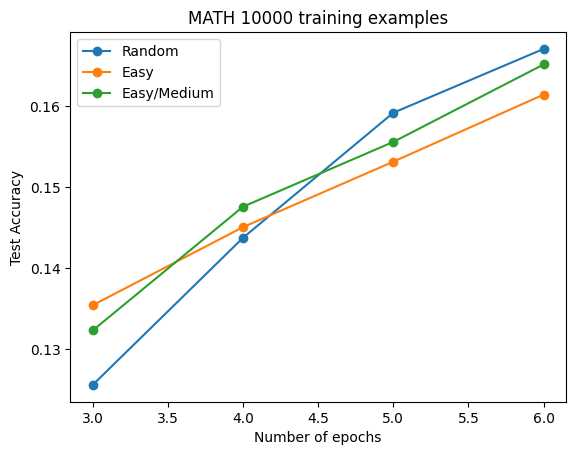

In [6]:
plt.plot([3, 4, 5, 6], rand_accs_all, "o-", label="Random")
plt.plot([3, 4, 5, 6], easy_accs_all, "o-",label="Easy")
plt.plot([3, 4, 5, 6], easymedium_accs_all, "o-", label="Easy/Medium")

plt.legend()
plt.title("MATH 10000 training examples")
plt.ylabel("Test Accuracy")
plt.xlabel("Number of epochs")

In [12]:
from datasets import load_dataset
dataset = load_dataset("hendrycks/competition_math")
test_levels = np.array([int(level[-1]) for level in dataset["test"]['level']])

In [13]:
# train_levels = np.array([int(level[-1]) for level in dataset["train"]['level']])

train_levels = []
for level in dataset["train"]['level']:
    if level[-1]!= "?":
        train_levels.append(int(level[-1]))
    else:
        train_levels.append(-1)

In [16]:
train_levels=np.array(train_levels)

print((train_levels==-1).sum())
print((train_levels==1).sum())
print((train_levels==2).sum())
print((train_levels==3).sum())
print((train_levels==4).sum())
print((train_levels==5).sum())

2
564
1348
1592
1690
2304


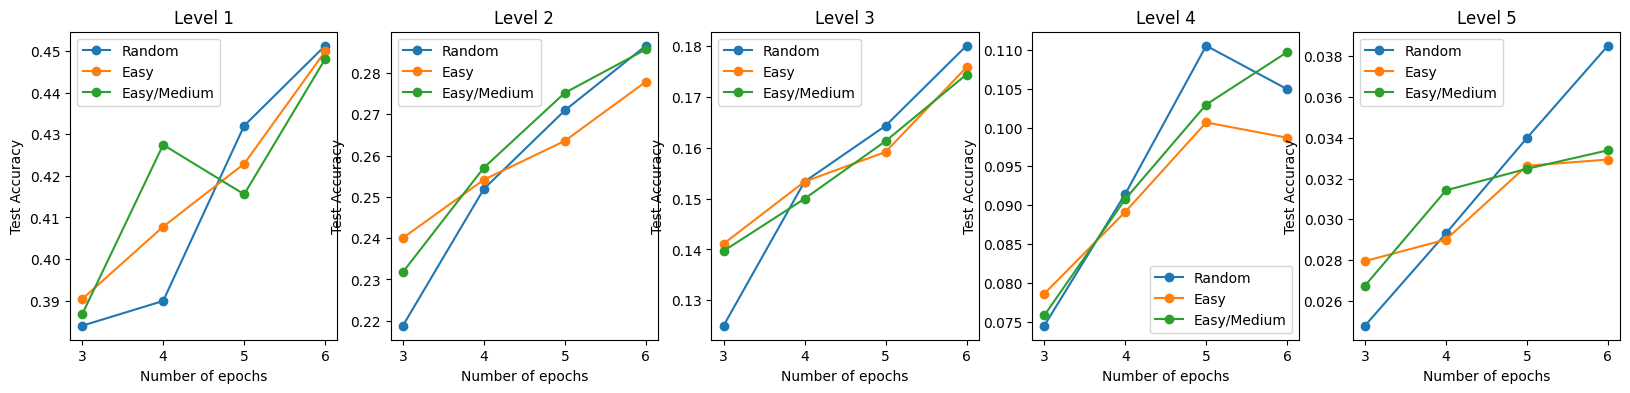

In [10]:
# make 5 subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    rand_accs_all= []
    easy_accs_all = []
    easymedium_accs_all = []

    subsample_idxs = np.where(test_levels==i+1)[0]


    for num_epochs in [3, 4, 5, 6]:
        rand_acc = (np.load(f"../ckpts/math_aug_fft_rand10000_{num_epochs}epochs/test_answer_types5.npy")==0)[subsample_idxs].mean()
        rand_accs_all.append(rand_acc)

        easy_acc = (np.load(f"../ckpts/math_aug_fft_easy10000_{num_epochs}epochs/test_answer_types5.npy")==0)[subsample_idxs].mean()
        easy_accs_all.append(easy_acc)
        
        easymedium_acc = (np.load(f"../ckpts/math_aug_fft_easymedium10000_{num_epochs}epochs/test_answer_types5.npy")==0)[subsample_idxs].mean()
        easymedium_accs_all.append(easymedium_acc)
    
    axs[i].plot([3, 4, 5, 6], rand_accs_all, "o-", label="Random")
    axs[i].plot([3, 4, 5, 6], easy_accs_all, "o-",label="Easy")
    axs[i].plot([3, 4, 5, 6], easymedium_accs_all, "o-", label="Easy/Medium")

    axs[i].legend()
    axs[i].set_title(f"Level {i+1}")
    axs[i].set_ylabel("Test Accuracy")
    axs[i].set_xlabel("Number of epochs")